# Homework 4: Differentiation and Integration

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

## Question 1: Write your own integration and differentiation routine 
(points - 0.5)

Write a function using your favourite algorithm to integrate a function from $a$ to $b$ and to take derivative at a specific point $x_0$. Use these functions in the solution of the next problem.

In [ ]:
def integrate(f, a, b, n=1024): # change to n=1024 for better accuracy
    dx = (b-a)/n
    res = 0
    for i in np.arange(a,b,dx):
        res += dx * f(i)
    return res

def derivative(f, x0, dx=0.01):
    return (f(x0 + dx) - f(x0))/dx

def integrate_fav(f, a, b, TOL=2**(-4)):    
    def integrate_(f, a, fa, b, fb, TOL):
        n = (a+b)/2
        fn = f(n)
        res = (b-a)/6 * (fa + 4*fn + fb)
        if res < TOL:
            return res
        else:
            return integrate_(f, a, fa, n, fn, TOL) \
            + integrate_(f, n, fn, b, fb, TOL)
    
    return integrate_(f, a, f(a), b, f(b), TOL)

def derivative_fav(f, x0, dx=.02):
    return 1/12/dx * \
        (-f(x0+dx+dx)
         -8*f(x0-dx)
         +8*f(x0+dx)
         +f(x0-dx-dx))

print("Integration simple sin(x) = \t", integrate(np.sin,0, 2*np.pi,2**10))
print("Integration simpson sin(x) = \t", integrate_fav(np.sin,0, 2*np.pi, 2**(-10)))
print("\nIntegration simple x^2 = \t", integrate((lambda x : x**2),0, 10, 2**(10)))
print("Integration simpson x^2 = \t", integrate_fav((lambda x : x**2),0, 10, 2**(-4)))

print("\nDerivative simple sin(x) = \t", derivative(np.sin, 0.5*np.pi,2**(-10)))
print("Derivative advanced sin(x) = \t", derivative_fav(np.sin, 0.5*np.pi,2**(-10)))
print("\nDerivative simple x^2 = \t", derivative((lambda x : x**2), 1, 2**(-10)))
print("Derivative advanced x^2 = \t", derivative_fav((lambda x : x**2), 1, 2**(-10)))

print("\n\tThanks for your attention!")

Integration simple sin(x) = 	 -2.1745029821912398e-17
Integration simpson sin(x) = 	 2.5648942582957195e-16

Integration simple x^2 = 	 332.84521102905273
Integration simpson x^2 = 	 333.33333333333337

Derivative simple sin(x) = 	 -0.00048828121123278834
Derivative advanced sin(x) = 	 -2.842170943040401e-14

Derivative simple x^2 = 	 2.0009765625
Derivative advanced x^2 = 	 2.0

	Thanks for your attention!


2.718281828459045

## Question 2: Quantum Harmonic Oscillator
---
(points - 2.5)

Quantum harmonic oscillator are described by the Hamiltonian,
$$
    H = \frac{p^2}{2} + \frac{1}{2}x^2
$$
The eigen functions are given by the formula (with $\hbar=1$, and also $m=\omega=1$ for simplicity, general expressions can be found in wikipedia),
$$
\psi_n(x)  = \frac{1}{\sqrt{2^n n!}} \left(\frac{1}{\pi}\right)^{1/4}e^{-\frac{x^2}{2}}H_n(x)
$$
where the Hermite polynomials are given as $H_n(x) = (-1)^n e^{x^2}\frac{d^n}{dx^n}(e^{-x^2})$.

  - 2.1) Find the first five Hermite polynomials. (use good old pen and paper! unless you are already familiar with `sympy`).
Fill up with the expressions of $H_n$ s
$$H_0(x) = \\
\cdots
$$

- 2.2) Plot the first five eigenfunctions on top of  the harmonic potential (second term in the Hamiltonian) shifted by their respective energy, $E_n = (n+\frac{1}{2})$. (the figure should look something like ![](https://upload.wikimedia.org/wikipedia/commons/9/9e/HarmOsziFunktionen.png))


In [196]:
def H0(x):
    return (1/np.pi)**(1/4) * np.e**(-x**2/2)
def H1(x):
    return H0(x) * 2*x/np.sqrt(2)
def H2(x):
    return H0(x) * (4*x**2 - 2)/np.sqrt(8)
def H3(x):
    return H0(x) * (8*x**3 - 12*x)/np.sqrt(8*6)
def H4(x):
    return H0(x) * (16*x**4 - 48*x**2 + 12)/np.sqrt(2**4*2*3*4)

H_all = [H0, H1, H2, H3, H4]

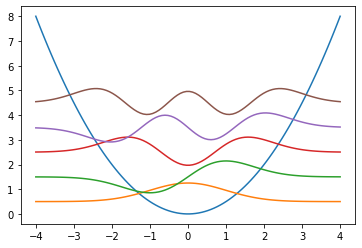

In [197]:
# plotting
x_max = 4
x_min = -x_max
xx = np.linspace(x_min, x_max, 100)

plt.plot(xx, (lambda x : 1/2* x**2)(xx))

En = 1/2
for H in H_all:
    plt.plot(xx, H(xx)+En)
    En += 1

 - 2.3) Choose one of the eigen function and calculate $\int_{-\infty}^{\infty}|\psi|^2 dx$. Check that it is close to 1.

For the integration with infinities choose some large value where $\psi$ goes to zero. Try increasing the value to see if the answers change too much, if yes then you should choose a value larger than the previous one.

**Bonus:** Can you think of another way to do such integral. Think about substitution.

In [194]:
for H in H_all: # some errors in integration!
    print(H, ":", 
    integrate_fav((lambda x : H(x)*H(x)), -2**4, 2**4), "\t",
    integrate((lambda x : H(x)*H(x)), -2**4, 2**4))

<function H0 at 0x000001F5D3D86DC0> : 1.0023437018294243 	 0.9999999999999997
<function H1 at 0x000001F5D3EF24C0> : 2.0386204714206347e-108 	 0.9999999999999997
<function H2 at 0x000001F5D3EF2550> : 0.9994443763225374 	 1.0000000000000002
<function H3 at 0x000001F5D3EF23A0> : 8.80279717260216e-104 	 1.0000000000000002
<function H4 at 0x000001F5D3EF2EE0> : 1.0001906649849732 	 1.0


 - 2.4) Choose the ground state wave function. Find $\langle x \rangle$, $\langle p \rangle$, $\langle x^2 \rangle$ and $\langle p^2 \rangle$

*Hint:* $\langle \mathcal{O} \rangle = \int_{-\infty}^{\infty} dx \psi^{*}(x)\mathcal{O}\psi(x)$; $p$ should be replaced by $-i\frac{d}{dx}$ and $p^2 =  p p = (-i\frac{d}{dx})(-i\frac{d}{dx}) = -\frac{d^2}{dx^2}$


In [193]:

# I don't understand it fully. Need to investigate.
'''
d_x_b = integrate(lambda x : np.conj(H0(x))*x*H0(x), -2**4, 2**4)
d_xx_b = integrate(lambda x : np.conj(H0(x))*x*x*H0(x), -2**4, 2**4)
p = lambda x : -1j*derivative_fav((lambda x : x), x, dx=0.002)
pp = lambda x : -derivative_fav(derivative_fav((lambda x : x), x, dx=0.002), x, dx=0.002)
d_p_b = integrate(lambda x : np.conj(H0(x))*p(x)*H0(x), -2**4, 2**4)
d_pp_b = integrate(lambda x : np.conj(H0(x))*pp(x)*H0(x), -2**4, 2**4)

print(d_x_b,"\n", d_xx_b, "\n", d_p_b, "\n", d_pp_b)
'''

'\nd_x_b = integrate(lambda x : np.conj(H0(x))*x*H0(x), -2**4, 2**4)\nd_xx_b = integrate(lambda x : np.conj(H0(x))*x*x*H0(x), -2**4, 2**4)\np = lambda x : -1j*derivative_fav((lambda x : x), x, dx=0.002)\npp = lambda x : -derivative_fav(derivative_fav((lambda x : x), x, dx=0.002), x, dx=0.002)\nd_p_b = integrate(lambda x : np.conj(H0(x))*p(x)*H0(x), -2**4, 2**4)\nd_pp_b = integrate(lambda x : np.conj(H0(x))*pp(x)*H0(x), -2**4, 2**4)\n\nprint(d_x_b,"\n", d_xx_b, "\n", d_p_b, "\n", d_pp_b)\n'

 - 2.5) Calculate $\Delta_x \Delta_p = \sqrt{(\langle x^2\rangle - \langle x\rangle^2)(\langle p^2\rangle - \langle p\rangle^2)}$. If your code is correct you should get the value $1/2$. The ground state reaches the Heisenberg Uncertainty limit (remember $\hbar=1$).

**Bonus:** Pick another eigen function and show that it satisfies the Heisenberg Uncertainty relation but the inequality is strict.

#### Coherent States
Coherent states for the quantum harmonic oscillator are the eigen states of the annihilation operator. $\hat{a}|\alpha\rangle = \alpha|\alpha\rangle$. where $\alpha$ is the eigen value. For this problem take $\alpha = \frac{1}{\sqrt{2}}$. Then the state in position space have the form
$$
\psi(x,t) = \left(\frac{1}{\pi}\right)^{1/4}\exp \left[-\frac{1}{2}\left(\left(x - \cos t\right)^2  + i \left(\sin t \cos  t -  t - x\sin t\right)\right)\right]
$$

- 2.6) Define the wave function below

In [ ]:
def coherent_state(x,t):
    pass

- 2.7) Take a range of time starting from 0 to $4\pi$. For each value of time calculate $\langle x \rangle$ and $\langle p \rangle$ for the above wave function. Plot them. Plot $\sin(t)$ and $\cos(t)$ on the same figure.

Coherent states behave exactly like a classical particle in a harmonic potential. 

**Bonus:** These states also saturates the uncertainty principle($\Delta_x\Delta_p = \frac{1}{2}$), along with $\Delta_x = \Delta_p = \frac{1}{\sqrt{2}}$ (symmetric spread in space and momentum).

Coherent states are used in quantum optics experiments. A generalization of these states(assymetric spread in space and momentum but saturates the uncertainty relation) known as squeezed coherent states are used in detecting gravitational waves, in atomic clocks as well as in quantum information processing.

Here is a sample code to animate the probability density of the coherent state. Familiarise yourself with the code. Add x and y labels; play with different parameters.

In [ ]:
# Set up the figure
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 100) 
line, = ax.plot(x, np.abs(coherent_state(x, 0))**2)  # Initialize plot with t = 0
# the plot does not have labels. add them

# Function to update the plot for each frame
def update(t):
    y = np.abs(coherent_state(x, t))**2 
    line.set_ydata(y)
    return line,

# Create the animation and save it
ani = FuncAnimation(fig, update, frames=np.linspace(0, 4*np.pi, 100), interval=40, blit=True)
ani.save('coherent_state.gif', writer=PillowWriter(fps=30))

**Bonus:** Find out a simple wave function for squeezed states ([wikipedia](https://en.wikipedia.org/wiki/Squeezed_coherent_state#Mathematical_definition)) and see how its probability changes with time using the same code as above i.e. replace `coherent_state` with your new wave function.